In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load the dataset
df = pd.read_csv("C:\\Users\\91964\\Desktop\\python pro\\Fraud.csv")

In [34]:
# Data Cleaning
# Handle missing values: fill missing values for merchants with 0
df['oldbalanceDest'] = df['oldbalanceDest'].fillna(0)
df['newbalanceDest'] = df['newbalanceDest'].fillna(0)

In [35]:
# Feature Engineering
# Convert transaction type to dummy variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [36]:
# Handle outliers: Example using Z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df['amount'])) < 3)]

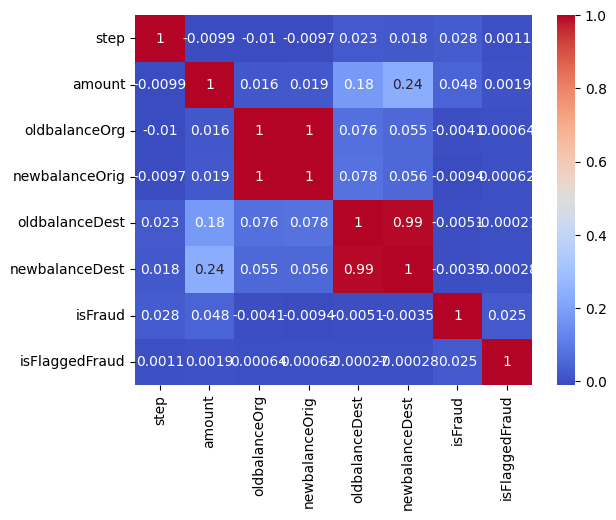

In [37]:
# Check for multi-collinearity
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
# Split the data
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
            'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X = df[features]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.9997082260725594
Precision: 0.9712374581939799
Recall: 0.7400611620795107
F1 Score: 0.8400347121781891
ROC AUC: 0.8700192254519347


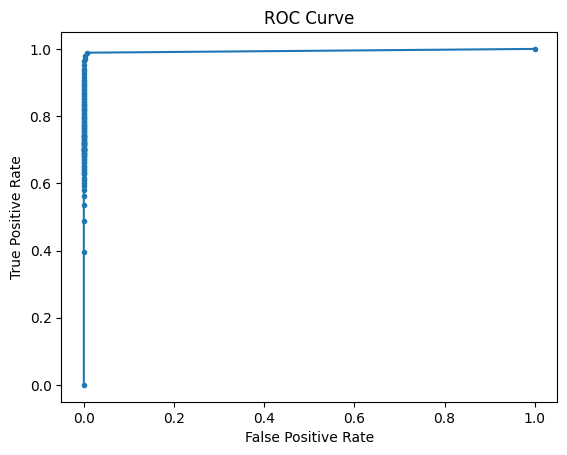

In [41]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
# Key Factors
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                importance
newbalanceDest    0.331756
oldbalanceOrg     0.244675
amount            0.145562
step              0.109087
oldbalanceDest    0.081947
type_TRANSFER     0.042293
newbalanceOrig    0.024356
type_CASH_OUT     0.016605
type_PAYMENT      0.003612
type_DEBIT        0.000107
